In [1]:
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
sns.set(font_scale=1.56)

In [2]:
titanic_train = pd.read_csv('train.csv')
titanic_test = pd.read_csv('test.csv')
df_data = titanic_train.append(titanic_test )

In [3]:
df_data.head()
#passengerid = 乘客ID
#Pclass = 座艙等級(1/2/3)
#Sex = 性別
#Age = 年齡
#Sib Sp =堂兄弟/妹個數
#Parch = 父母與小孩個數
#Ticket = 船票訊息
#Fare = 票價
#Cabin =客艙
#Embarked = 登船港口

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [4]:
titanic_train.info()
#可發現AGE，CABRIN，Embarked有遺漏

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [6]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
titanic_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


由下圖可發現，女性存活比例較高

,Sex,Survived
0,female,0.742
1,male,0.189


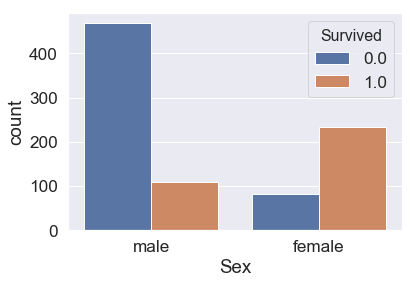

In [8]:
sns.countplot(df_data['Sex'], hue=df_data['Survived'])
df_data[["Sex", "Survived"]].groupby(['Sex'],as_index=False ).mean().round(3)


由圖可發現船艙等級越高，存活率相對越高

,Pclass,Survived
0,1,0.630
1,2,0.473
2,3,0.242


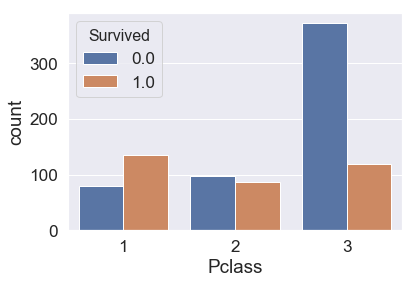

In [9]:
sns.countplot(df_data['Pclass'],hue=df_data['Survived'])
df_data[["Pclass", "Survived"]].groupby(['Pclass'],as_index=False ).mean().round(3)

可發現無論在哪個Pclass，女性的存活率皆非常高，而在Pclass1的男性存活率也僅有0.36  
目前可看出Pclass是一個重要的特徵

,Pclass,Sex,Survived
0,1,female,0.968
1,1,male,0.369
2,2,female,0.921
3,2,male,0.157
4,3,female,0.500
5,3,male,0.135


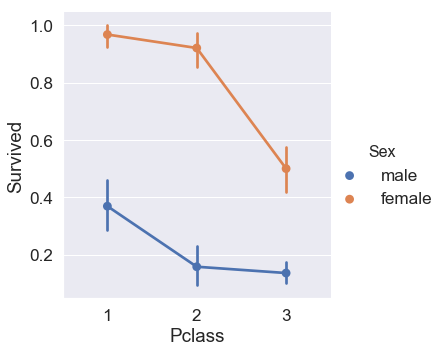

In [10]:
sns.factorplot('Pclass','Survived',hue='Sex',data=df_data)
df_data[["Pclass", "Survived",'Sex']].groupby(['Pclass','Sex'],as_index=False ).mean().round(3)

S港出發存活率較低

,Embarked,Survived
0,C,0.554
1,Q,0.390
2,S,0.337


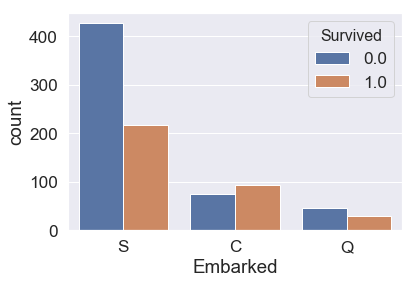

In [11]:
sns.countplot(df_data['Embarked'],hue=df_data['Survived'])
df_data[["Embarked", "Survived"]].groupby(['Embarked'],as_index=False ).mean().round(3)

1.觀察各港口入港乘客與其性別關係，各港口男性乘客皆較多，而在S港男性比例更高  
2.觀察入港乘客與其船艙等級關係，S港存活率較低原因為大多數來自Pclass3  
3.c港存活率較高，可能原因為Pclass1和2被救援率較高  
4.Q港及大部分的人皆來自pclass3因此存活率低

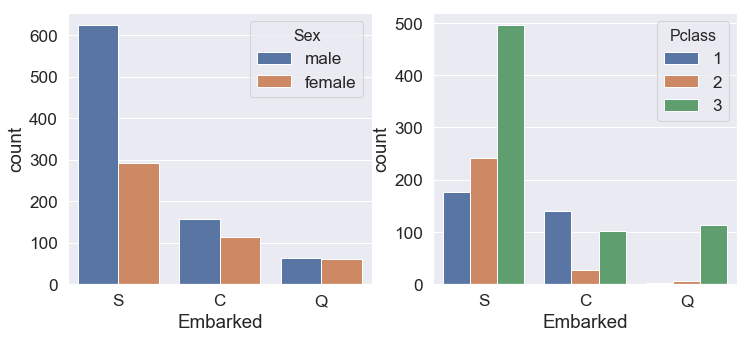

In [12]:
fig,ax =plt.subplots(1,2,figsize=(12,5))
sns.countplot(df_data['Embarked'],hue=df_data['Sex'],ax=ax[0])
sns.countplot(df_data['Embarked'],hue=df_data['Pclass'],ax=ax[1])
plt.show()

觀察下列三圖  
1.不論從何港入船，pclass1及2中女性生存機率皆在0.9以上且逼近於1  
2.而pclass3的旅客在S港上船，其不論性別生存率皆非常低  
3.而Q港中對於男性存活率最低，其可能原因為主要乘客皆是屬於pclass3  

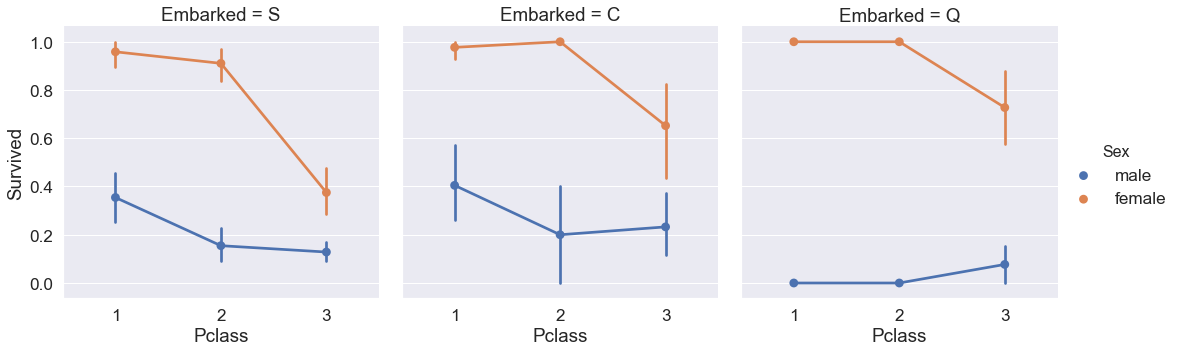

In [13]:
sns.factorplot('Pclass','Survived',hue='Sex',col='Embarked',data=df_data)
plt.show()

Embarked 缺失值僅有3個，因此以最多人入港的S港來進行填補

In [14]:
#將Embarked 以S來填補
df_data['Embarked'] =titanic_train['Embarked'].fillna('S')
df_data.Embarked.isnull().any()

False

由圖可發現 年齡小於4歲生存率高
在15到25歲間存活率低
大部分乘客都在15~35歲間

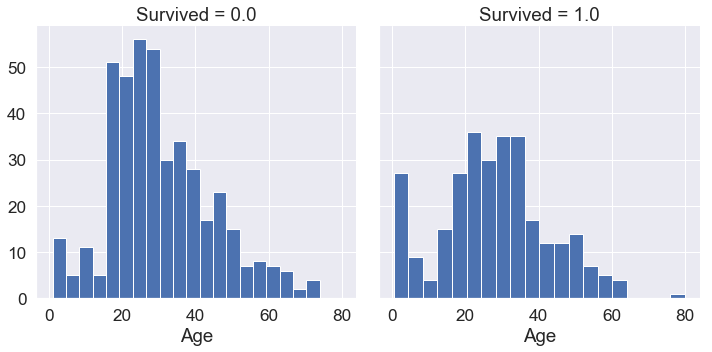

In [15]:
g = sns.FacetGrid(df_data, col='Survived',size =5)
g.map(plt.hist, 'Age', bins=20)

In [16]:
df_data['Title'] =df_data.Name.str.extract('([A-Za-z]+)\.')
print(pd.crosstab(df_data['Title'],df_data['Sex']).T)
df_data['Title'] = df_data.Title.replace(['Capt','Col','Countess','Don','Dr',
                                          'Dona','Jonkheer','Major','Rev','Sir']
                                        ,'Other')
df_data['Title'] = df_data.Title.replace(['Mlle','Ms','Mme'],'Miss')
df_data['Title'] = df_data.Title.replace(['Lady'],'Mrs')
df_data.groupby('Title')['Age'].median()

Title   Capt  Col  Countess  Don  Dona  Dr  Jonkheer  Lady  Major  Master  \
Sex                                                                         
female     0    0         1    0     1   1         0     1      0       0   
male       1    4         0    1     0   7         1     0      2      61   

Title   Miss  Mlle  Mme   Mr  Mrs  Ms  Rev  Sir  
Sex                                              
female   260     2    1    0  197   2    0    0  
male       0     0    0  757    0   0    8    1  


Title
Master     4.0
Miss      22.0
Mr        29.0
Mrs       36.0
Other     47.0
Name: Age, dtype: float64

In [17]:
df_data.loc[(df_data.Age.isnull())&(df_data.Title=='Mr'),'Age']=29
df_data.loc[(df_data.Age.isnull())&(df_data.Title=='Mrs'),'Age']=36
df_data.loc[(df_data.Age.isnull())&(df_data.Title=='Master'),'Age']=4
df_data.loc[(df_data.Age.isnull())&(df_data.Title=='Miss'),'Age']=22
df_data.loc[(df_data.Age.isnull())&(df_data.Title=='Other'),'Age']=47

df_data.Age.isnull().any()

False

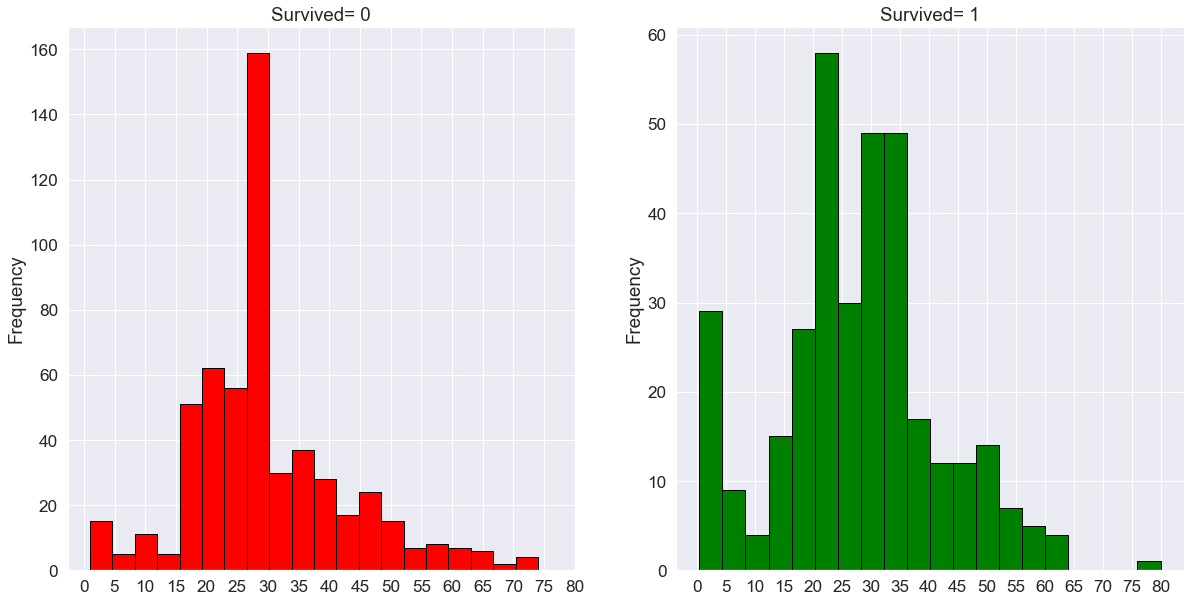

In [18]:
f,ax=plt.subplots(1,2,figsize=(20,10))
df_data[df_data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set(xticks=(list(range(0,85,5))),title='Survived= 0')

df_data[df_data['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set(xticks=(list(range(0,85,5))),title='Survived= 1')

plt.show()

低票價乘客死亡率高出許多

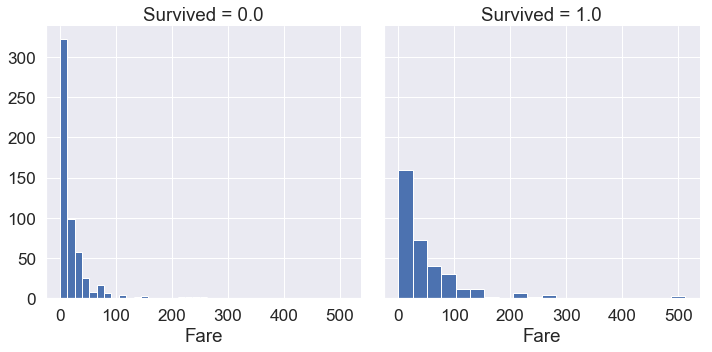

In [19]:
g = sns.FacetGrid(df_data, col='Survived',size =5)
g.map(plt.hist, 'Fare', bins=20)

票價高至低的船艙依序為 pclass1、pclass2、pclass3

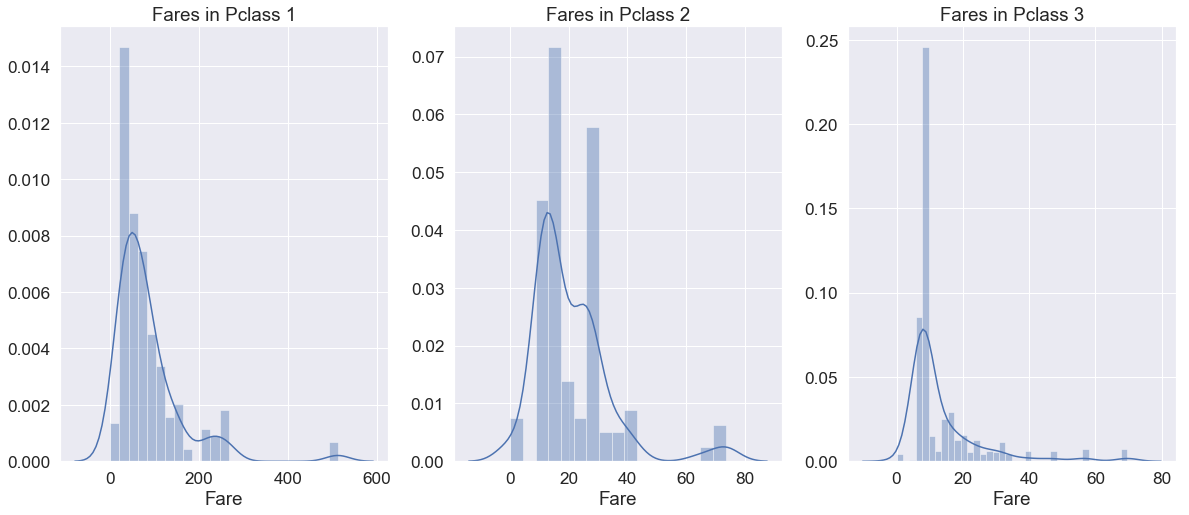

In [20]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(titanic_train[titanic_train['Pclass']==1].Fare,ax=ax[0])
ax[0].set(title='Fares in Pclass 1')
sns.distplot(titanic_train[titanic_train['Pclass']==2].Fare,ax=ax[1])
ax[1].set(title='Fares in Pclass 2')
sns.distplot(titanic_train[titanic_train['Pclass']==3].Fare,ax=ax[2])
ax[2].set(title='Fares in Pclass 3')
plt.show()

由表中發現 獨自來的人的生存率皆比有跟兄弟姊妹或有父母小孩人還來的低

   SibSp  Survived
0      0     0.345
1      1     0.536
2      2     0.464
3      3     0.250
4      4     0.167
5      5     0.000
6      8     0.000
   Parch  Survived
0      0     0.344
1      1     0.551
2      2     0.500
3      3     0.600
4      4     0.000
5      5     0.200
6      6     0.000
7      9       NaN


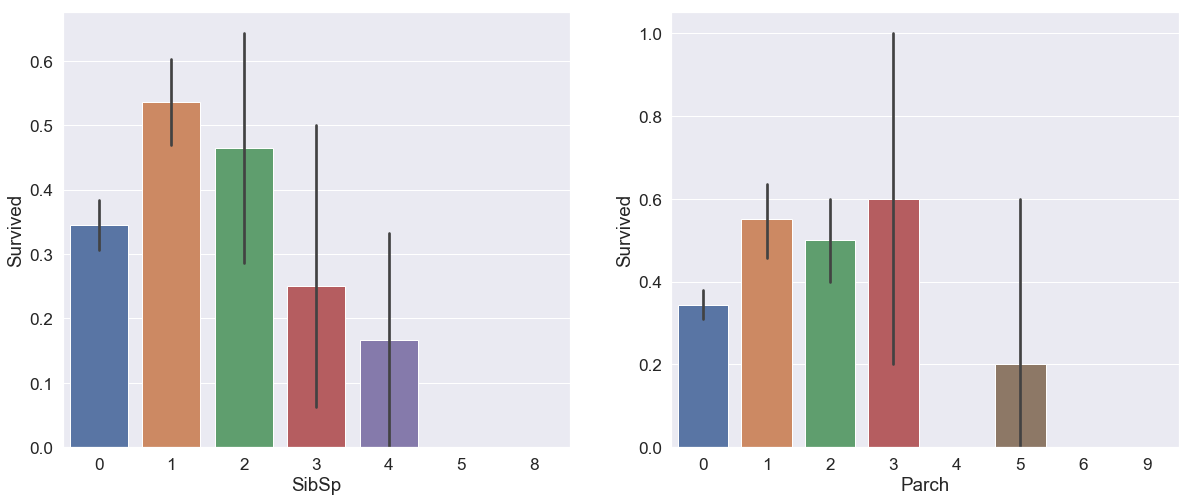

In [21]:
x=df_data[["SibSp", "Survived"]].groupby(["SibSp"],as_index=False ).mean().round(3)
y=df_data[["Parch", "Survived"]].groupby(["Parch"],as_index=False ).mean().round(3)
print(x)
print(y)
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('SibSp','Survived',data=df_data,ax=ax[0])
sns.barplot('Parch','Survived',data=df_data,ax=ax[1])
plt.show()

接者觀察sibsp和parch與pclass中的交叉項  
1.sibsp>3的乘客皆在pclass3當中,也可能是造成sibsp>3時生存率較低的因素
2.parch>4中也與上述有相同情況

In [22]:
print(pd.crosstab(df_data['Pclass'],df_data['SibSp']).T)
print(pd.crosstab(df_data['Pclass'],df_data['Parch']).T)

Pclass    1    2    3
SibSp                
0       198  182  511
1       113   82  124
2         8   12   22
3         4    1   15
4         0    0   22
5         0    0    6
8         0    0    9
Pclass    1    2    3
Parch                
0       242  206  554
1        50   43   77
2        27   25   61
3         2    3    3
4         2    0    4
5         0    0    6
6         0    0    2
9         0    0    2


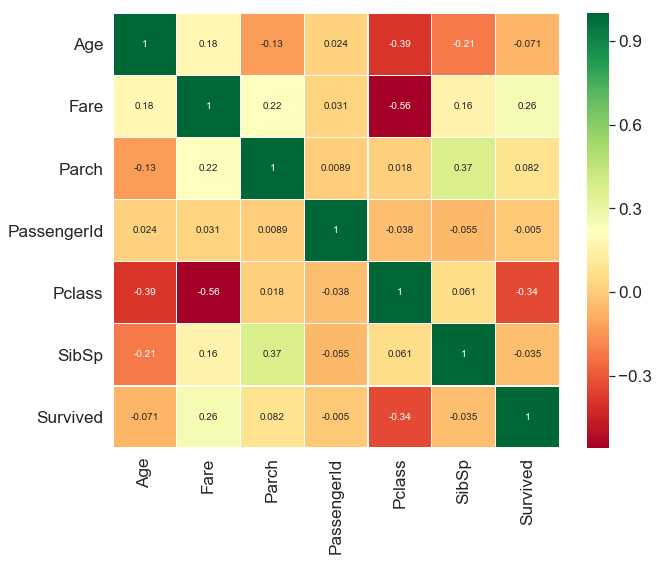

In [23]:
sns.heatmap(df_data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

建立家庭人數特徵(sibSp+Parch)  
建立是否獨自出遊特徵(Alone)

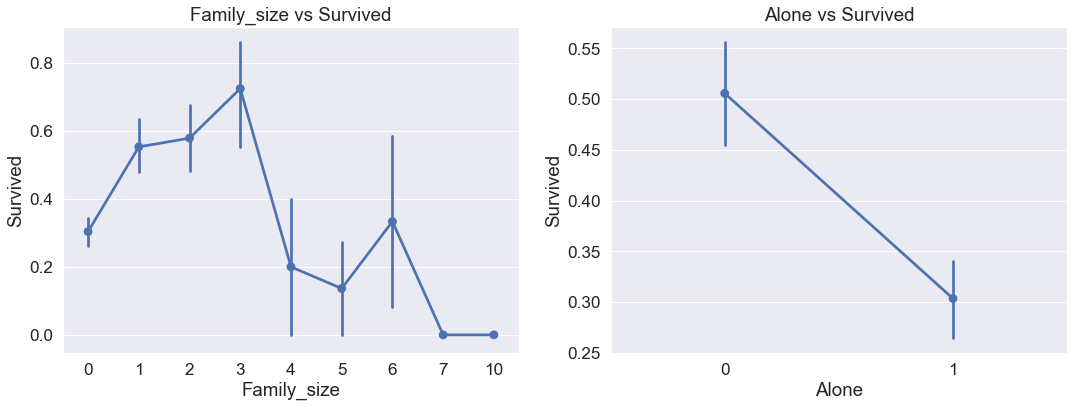

In [24]:
df_data['Family_size']=df_data['SibSp']+df_data['Parch']
df_data['Alone']=0
df_data.loc[df_data.Family_size==0,'Alone']=1

#觀察family_size&Alone 對存活率的影響
f,ax=plt.subplots(1,2,figsize=(18,6))
sns.factorplot('Family_size','Survived',data=df_data,ax=ax[0])
sns.factorplot('Alone','Survived',data=df_data,ax=ax[1])

ax[0].set(title='Family_size vs Survived')
ax[1].set(title='Alone vs Survived')
plt.close(2)
plt.close(3)
plt.show()

觀察下圖  
1.在pclass1與2中可看出單獨出遊的單獨存活率是有很大影響的  
2.僅在pclass3中單獨出遊的女性存活率高於有家庭的女性

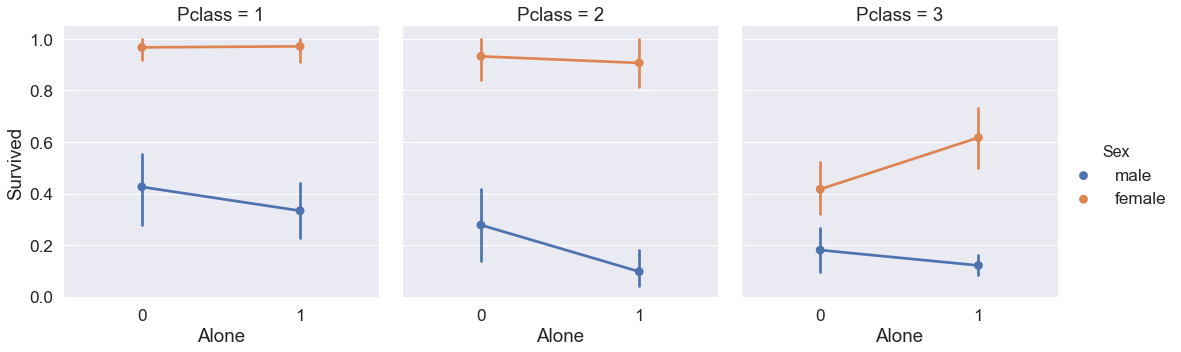

In [25]:
sns.factorplot('Alone','Survived',hue='Sex',col='Pclass',data=df_data)
plt.show()

FareRange_Code_5
0    0.217877
1    0.201087
2    0.424419
3    0.445652
4    0.645349
Name: Survived, dtype: float64


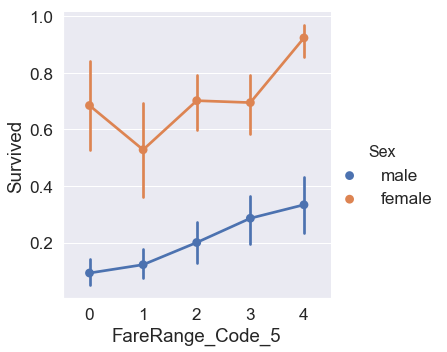

In [26]:
#將Fare以平均數來填補
df_data['Fare'] = df_data['Fare'].fillna(df_data['Fare'].mean())
df_data['Fare_Range']=pd.qcut(df_data['Fare'],5)
from sklearn.preprocessing import LabelEncoder
label =LabelEncoder()
df_data['FareRange_Code_5'] = label.fit_transform(df_data['Fare_Range'])
df_5 = df_data.groupby(['FareRange_Code_5'])['Survived'].mean()
print(df_5)
sns.factorplot('FareRange_Code_5','Survived',data=df_data,hue="Sex")
plt.show()

由於年紀有較多缺失值，且為連續變數以下採取兩種分割方法  
1.年齡最大值為80，取5等份每份以16做為切割  
2.在前面有提到年齡較小有較高存活率，因此將16作為一個2元分類變數  

In [27]:
df_data['Age_bin']=0
df_data.loc[df_data.Age<=16,'Age_bin']=0
df_data.loc[(df_data.Age>16)&(df_data.Age<=32),'Age_bin']=1
df_data.loc[(df_data.Age>32)&(df_data.Age<=48),'Age_bin']=2
df_data.loc[(df_data.Age>48)&(df_data.Age<=64),'Age_bin']=3
df_data.loc[(df_data.Age>64)&(df_data.Age<=80),'Age_bin']=4
df_data['Age_bin'].value_counts().sort_index()

0    142
1    751
2    297
3    106
4     13
Name: Age_bin, dtype: int64

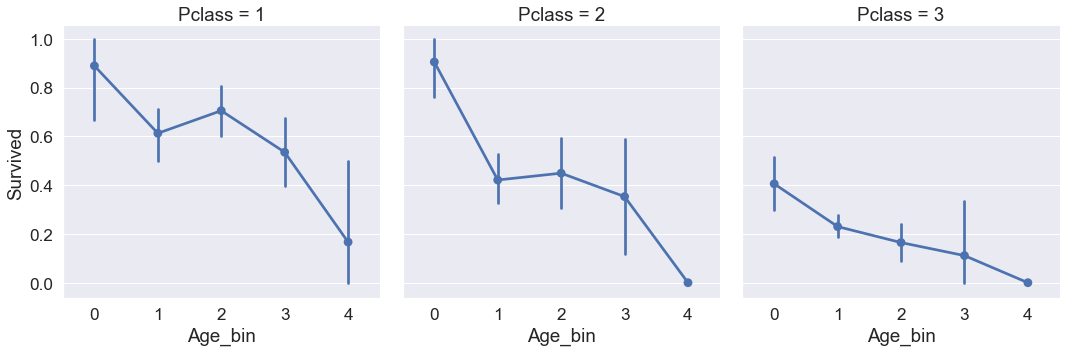

In [28]:
sns.factorplot('Age_bin','Survived',data=df_data,col='Pclass')
plt.show()

In [29]:
df_data['Age_bin2']=0
df_data.loc[df_data.Age<=16,'Age_bin2']=0
df_data.loc[df_data.Age>16,'Age_bin2']=1
df_data['Age_bin2'].value_counts()

1    1167
0     142
Name: Age_bin2, dtype: int64

In [30]:
#將資料轉換為數字
df_data['Sex_Code'] = df_data['Sex'].map({'female' : 1, 'male' : 0}).astype('int')
df_data['Embarked_Code'] = df_data['Embarked'].map({'S' : 0,'Q':1, 'C' : 2}).astype('int')
df_data['Title_Code'] =df_data['Title'].map({'Master' : 0,'Mr':1, 'Miss' : 2,'Mrs':3,'Other':4}).astype('int')
#檢查是否有缺失值
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 22 columns):
Age                 1309 non-null float64
Cabin               295 non-null object
Embarked            1309 non-null object
Fare                1309 non-null float64
Name                1309 non-null object
Parch               1309 non-null int64
PassengerId         1309 non-null int64
Pclass              1309 non-null int64
Sex                 1309 non-null object
SibSp               1309 non-null int64
Survived            891 non-null float64
Ticket              1309 non-null object
Title               1309 non-null object
Family_size         1309 non-null int64
Alone               1309 non-null int64
Fare_Range          1309 non-null category
FareRange_Code_5    1309 non-null int32
Age_bin             1309 non-null int64
Age_bin2            1309 non-null int64
Sex_Code            1309 non-null int32
Embarked_Code       1309 non-null int32
Title_Code          1309 non-null int32
d

目前使用的變數如下:  
1.Sex_Code    
2.Pclass  
3.Embarked_Code    
4.Family_size  
5.Alone  
6.Age_bin&Age_bin2  
7.FareRange_Code_5  
8.Title_Code

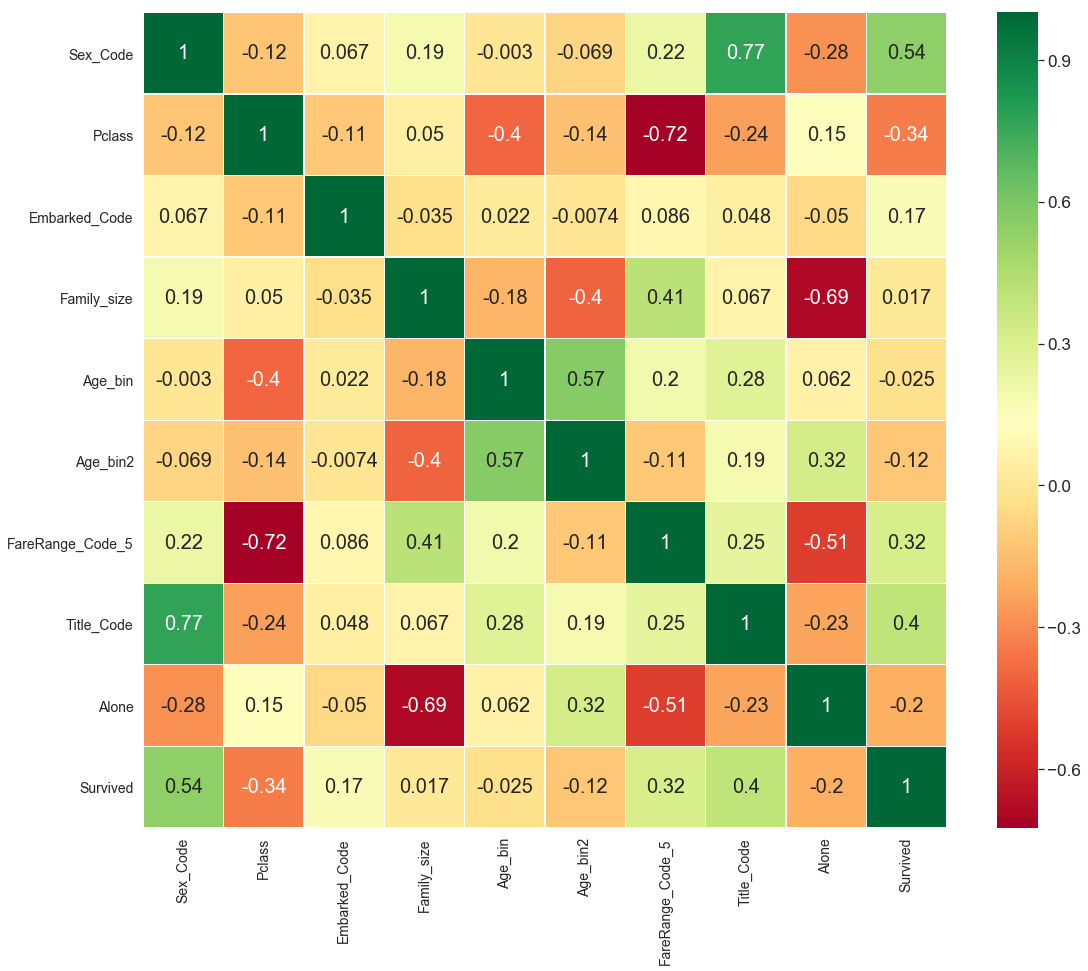

In [31]:
pre=['Sex_Code','Pclass','Embarked_Code','Family_size','Age_bin','Age_bin2','FareRange_Code_5','Title_Code','Alone','Survived']
sns.heatmap(df_data[pre].corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

由相關係數圖可發現  
1.稱謂與性別有高度相關，因此根據前述分析我們選擇Sex  
2.在Age部分先以Age_bin作為分析變數，Age_bin2則在後續可以加入考量  

In [32]:
pred=['Sex_Code','Pclass','Embarked_Code','Family_size','Age_bin','FareRange_Code_5','Alone']

In [33]:
from sklearn.linear_model import LogisticRegression 
from sklearn import svm 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.metrics import confusion_matrix 

In [34]:
df_train = df_data[:len(titanic_train)]
df_test = df_data[len(titanic_train):]

X = df_train[pred]
y = df_train['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

### Radial Support Vector Machines

In [35]:
model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(X_train,y_train)
prediction1=model.predict(X_test)
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction1,y_test))

Accuracy for rbf SVM is  0.7798507462686567


### Linear Support Vector Machine

In [36]:
model=svm.SVC(kernel='linear',C=0.1,gamma=0.1)
model.fit(X_train,y_train)
prediction2=model.predict(X_test)
print('Accuracy of linear SVM is ',metrics.accuracy_score(prediction2,y_test))

Accuracy of linear SVM is  0.7388059701492538


### Logistic Regression

In [37]:
model = LogisticRegression()
model.fit(X_train,y_train)
prediction3=model.predict(X_test)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,y_test))

The accuracy of the Logistic Regression is 0.7686567164179104


### Decision Tree

In [38]:
model=DecisionTreeClassifier()
model.fit(X_train,y_train)
prediction4=model.predict(X_test)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,y_test))

The accuracy of the Decision Tree is 0.7835820895522388


### K-Nearest Neighbours(KNN)

In [39]:
model=KNeighborsClassifier() 
model.fit(X_train,y_train)
prediction5=model.predict(X_test)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction5,y_test))

The accuracy of the KNN is 0.7686567164179104


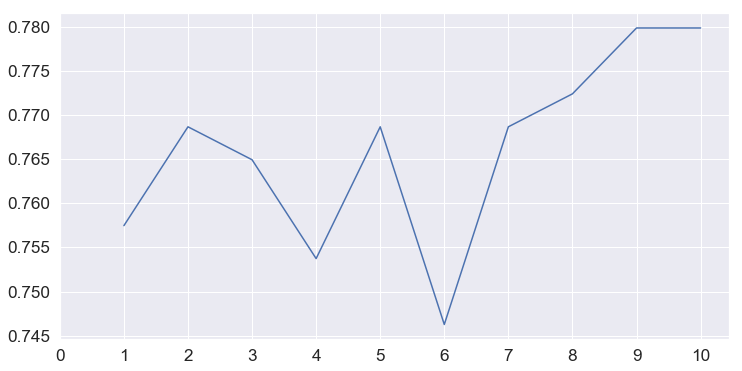

Accuracies for different values of n are: [0.75746269 0.76865672 0.76492537 0.75373134 0.76865672 0.74626866
 0.76865672 0.77238806 0.77985075 0.77985075] with the max value as  0.7798507462686567


In [40]:
a_index=list(range(1,11))
a=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(X_train,y_train)
    prediction=model.predict(X_test)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,y_test)))
plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:',a.values,'with the max value as ',a.values.max())

### Random Forests

In [41]:
model=RandomForestClassifier(n_estimators=100)
model.fit(X_train,y_train)
prediction6=model.predict(X_test)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction6,y_test))

The accuracy of the Random Forests is 0.7910447761194029


In [42]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import cross_val_predict 

kfold = KFold(n_splits=10, random_state=22)
cvm=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN',
             'Decision Tree','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),
        KNeighborsClassifier(n_neighbors=5),DecisionTreeClassifier(),
        RandomForestClassifier(n_estimators=100)]
for i in models:
    model=i
    cv_result = cross_val_score(model,X,y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    cvm.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':cvm,'Std':std},index=classifiers)       
new_models_dataframe2
    

,CV Mean,Std
Linear Svm,0.785618,0.038821
Radial Svm,0.822684,0.032793
Logistic Regression,0.793546,0.030997
KNN,0.789089,0.039807
Decision Tree,0.813720,0.030446
Random Forest,0.817091,0.033141


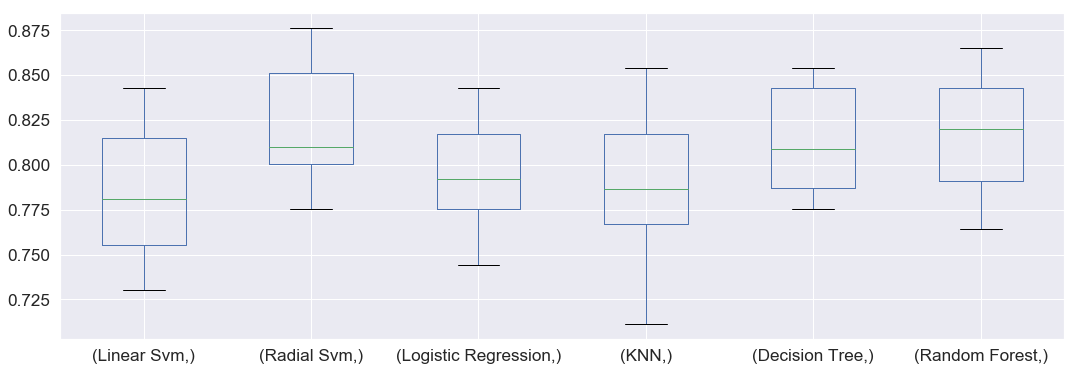

In [43]:
plt.subplots(figsize=(18,6))
box=pd.DataFrame(accuracy,index=[classifiers])
box.T.boxplot()
plt.show()

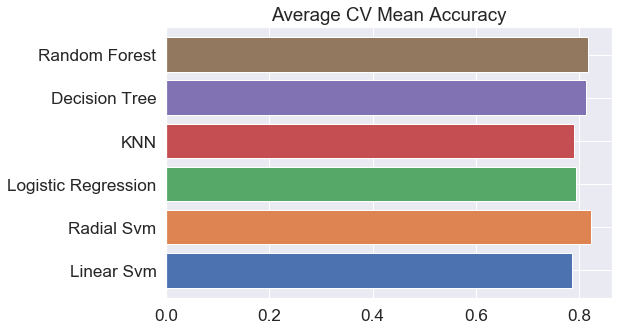

In [44]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

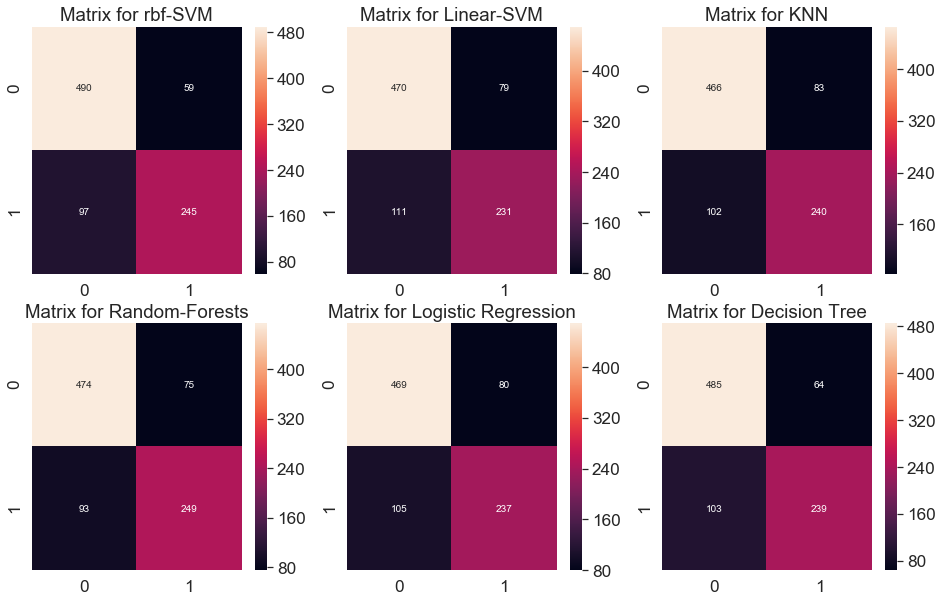

In [45]:
f,ax=plt.subplots(2,3,figsize=(16,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')

y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')

y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=5),X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')

y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')

y_pred = cross_val_predict(LogisticRegression(),X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')

y_pred = cross_val_predict(DecisionTreeClassifier(),X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')


plt.show()

參數調整

In [46]:
from sklearn.model_selection import GridSearchCV
C=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel=['rbf','linear']
hyper={'kernel':kernel,'C':C,'gamma':gamma}
gd=GridSearchCV(estimator=svm.SVC(),param_grid=hyper,verbose=True)
gd.fit(X,y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 3 folds for each of 240 candidates, totalling 720 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8226711560044894
SVC(C=0.4, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.2, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed:    9.6s finished


In [47]:
n_estimators=range(100,1000,100)
hyper={'n_estimators':n_estimators}
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper,verbose=True)
gd.fit(X,y)
print(gd.best_score_)
print(gd.best_estimator_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:   13.2s finished


0.8125701459034792
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=900, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)


In [48]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf=VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=10)),
                                              ('RBF',svm.SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
                                              ('RFor',RandomForestClassifier(n_estimators=500,random_state=0)),
                                              ('LR',LogisticRegression(C=0.05)),
                                              ('DT',DecisionTreeClassifier(random_state=0)),
                                              ('svm',svm.SVC(kernel='linear',probability=True))
                                             ], 
                       voting='soft').fit(X_train,y_train)
print('The accuracy for ensembled model is:',ensemble_lin_rbf.score(X_test,y_test))
cross=cross_val_score(ensemble_lin_rbf,X,y, cv = 10,scoring = "accuracy")
print('The cross validated score is',cross.mean())

The accuracy for ensembled model is: 0.7910447761194029
The cross validated score is 0.8159505163999545


In [49]:
from sklearn.ensemble import BaggingClassifier
model=BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3),random_state=0,n_estimators=700)
model.fit(X_train,y_train)
prediction=model.predict(X_test)
print('The accuracy for bagged KNN is:',metrics.accuracy_score(prediction,y_test))
result=cross_val_score(model,X,y,cv=10,scoring='accuracy')
print('The cross validated score for bagged KNN is:',result.mean())

The accuracy for bagged KNN is: 0.7835820895522388
The cross validated score for bagged KNN is: 0.7980354102826014


In [50]:
model=BaggingClassifier(base_estimator=DecisionTreeClassifier(),random_state=0,n_estimators=100)
model.fit(X_train,y_train)
prediction=model.predict(X_test)
print('The accuracy for bagged Decision Tree is:',metrics.accuracy_score(prediction,y_test))
result=cross_val_score(model,X,y,cv=10,scoring='accuracy')
print('The cross validated score for bagged Decision Tree is:',result.mean())

The accuracy for bagged Decision Tree is: 0.7947761194029851
The cross validated score for bagged Decision Tree is: 0.8092719328112586


In [51]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.1)
result=cross_val_score(ada,X,y,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoost is:',result.mean())

The cross validated score for AdaBoost is: 0.7980351265463625


In [52]:
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.1)
result=cross_val_score(grad,X,y,cv=10,scoring='accuracy')
print('The cross validated score for Gradient Boosting is:',result.mean())

The cross validated score for Gradient Boosting is: 0.8137416297809557


In [53]:
import xgboost as xg
xgboost=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
result=cross_val_score(xgboost,X,y,cv=10,scoring='accuracy')
print('The cross validated score for XGBoost is:',result.mean())

The cross validated score for XGBoost is: 0.8160137895812053


In [54]:
n_estimators=list(range(100,1100,100))
learn_rate=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper={'n_estimators':n_estimators,'learning_rate':learn_rate}
gd=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=hyper,verbose=True)
gd.fit(X,y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 3 folds for each of 120 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8058361391694725
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.05, n_estimators=100, random_state=None)


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:  4.0min finished


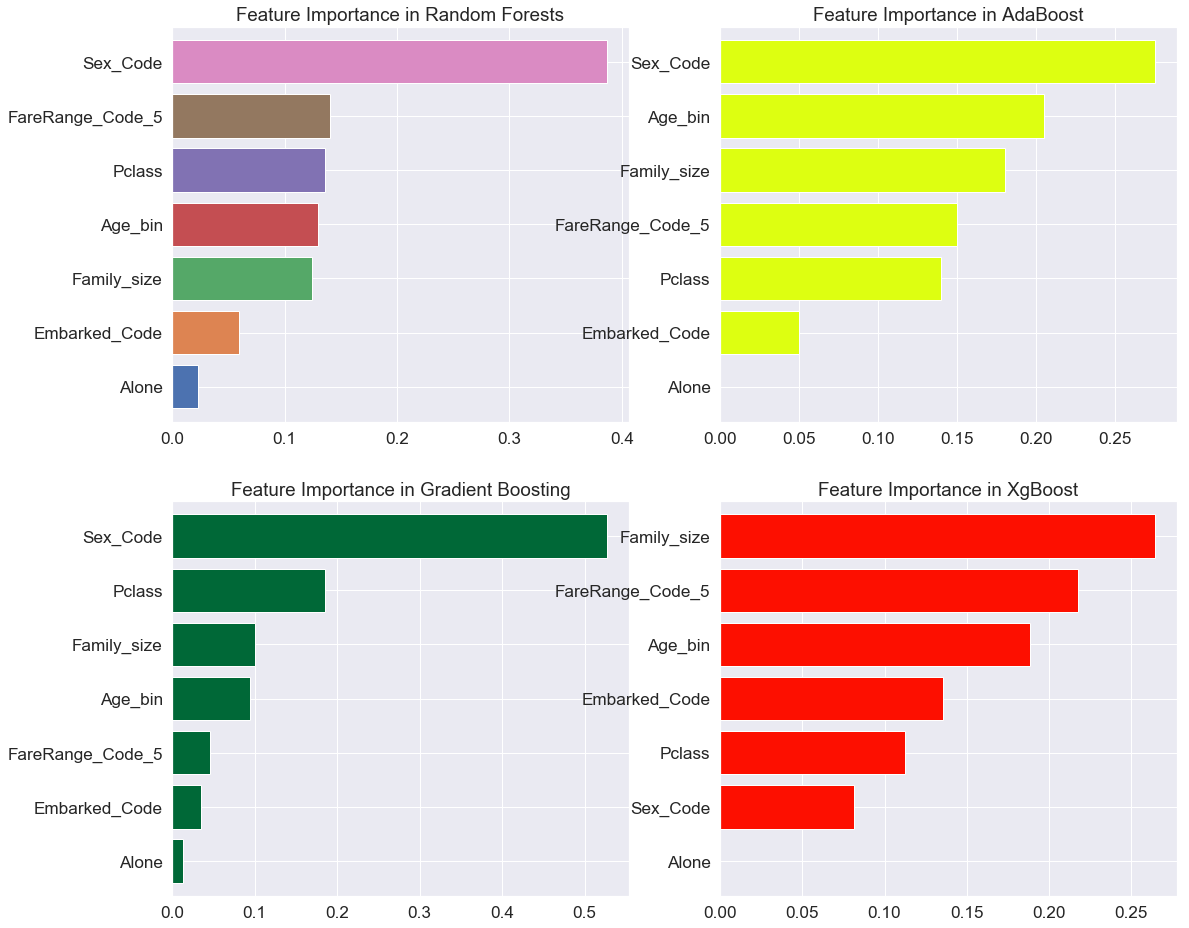

In [59]:
f,ax=plt.subplots(2,2,figsize=(18,16))
model=RandomForestClassifier(n_estimators=500,random_state=0)
model.fit(X,y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')
model=AdaBoostClassifier(n_estimators=200,learning_rate=0.05,random_state=0)
model.fit(X,y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1],color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')
model=GradientBoostingClassifier(n_estimators=500,learning_rate=0.1,random_state=0)
model.fit(X,y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,0],cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')
model=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
model.fit(X,y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,1],color='#FD0F00')
ax[1,1].set_title('Feature Importance in XgBoost')
plt.show()